In [101]:
import numpy as np
import pandas as pd
import re
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [102]:
df = pd.read_csv("job2.csv", sep='\s*;\s*', engine='python')
df.columns

Index(['job_title', 'company', 'company_size', 'industry',
       'required_experience', 'posting_date', 'closing_date', 'link',
       'job_description'],
      dtype='object')

In [103]:
for column in df.columns:
    df[column] = df[column].str.replace("\t","")

In [104]:
df["cleaned_des"] = df.job_description.str.replace('[^ a-zA-Z0-9]+', ' ').str.replace(' +', ' ')
#df[["job_title","company" , "cleaned_des"]]

In [105]:
noise_list = STOPWORDS
def _remove_noise(input_text):
    words = input_text.split() 
    noise_free_words = [word for word in words if word not in noise_list] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [107]:
df["cleaned_des"] = df["cleaned_des"].apply(_remove_noise)

In [134]:
df["des_counter"] = df["cleaned_des"].str.lower().str.split().apply(Counter)

In [149]:
users_interests = {"Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra", "NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres", "Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas", "R", "Python", "statistics", "regression", "probability", "machine learning", "regression", "decision trees", "libsvm", "Python", "R", "Java", "C++", "Haskell", "programming languages", "statistics", "probability", "mathematics", "theory", "machine learning", "scikit-learn", "Mahout", "neural networks", "neural networks", "deep learning", "Big Data", "artificial intelligence", "Hadoop", "Java", "MapReduce", "Big Data", "statistics", "R", "statsmodels", "C++", "deep learning", "artificial intelligence", "probability", "pandas", "R", "Python", "databases", "HBase", "Postgres", "MySQL", "MongoDB", "libsvm", "regression", "support vector machines"}


In [168]:
users_interests.update(["PyTorch","sklearn","Seaborn"])


In [169]:
lower_keywords = " ".join(users_interests).lower().split()
lower_keywords

['mahout',
 'statistics',
 'mongodb',
 'seaborn',
 'spark',
 'deep',
 'learning',
 'hadoop',
 'support',
 'vector',
 'machines',
 'r',
 'pandas',
 'decision',
 'trees',
 'hbase',
 'postgres',
 'storm',
 'scipy',
 'java',
 'regression',
 'nosql',
 'numpy',
 'neural',
 'networks',
 'azure',
 'pytorch',
 'mapreduce',
 'cassandra',
 'machine',
 'learning',
 'c++',
 'theory',
 'mathematics',
 'tableau',
 'scikit-learn',
 'databases',
 'statsmodels',
 'python',
 'artificial',
 'intelligence',
 'haskell',
 'sklearn',
 'big',
 'data',
 'libsvm',
 'probability',
 'mysql',
 'aws',
 'programming',
 'languages']

In [ ]:
sorted(d.items(), key=lambda x: (-x[1], x[0]))

In [135]:
df["des_counter"] = df["des_counter"].apply(lambda x: sorted(x.items(), key=lambda x: (-x[1], x[0])))

In [170]:
for item in df["des_counter"]:
    print("Row#")
    for word in item:
        if word[0] in lower_keywords:
            print(word[0]+ ":" + str(word[1]),"\n")
        #print(item[0][0],"\n")

Row#
data:3 

aws:1 

mathematics:1 

support:1 

Row#
data:20 

big:3 

hadoop:2 

languages:2 

learning:2 

machine:2 

deep:1 

mathematics:1 

python:1 

r:1 

spark:1 

statistics:1 

support:1 

Row#
data:6 

learning:3 

deep:2 

hadoop:2 

java:2 

python:2 

spark:2 

aws:1 

big:1 

languages:1 

machine:1 

mapreduce:1 

mathematics:1 

programming:1 

statistics:1 

Row#
data:8 

hadoop:1 

intelligence:1 

programming:1 

python:1 

r:1 

tableau:1 

Row#
data:6 

learning:3 

deep:2 

hadoop:2 

java:2 

python:2 

spark:2 

aws:1 

big:1 

languages:1 

machine:1 

mapreduce:1 

mathematics:1 

programming:1 

statistics:1 

Row#
data:6 

machine:4 

learning:3 

intelligence:1 

java:1 

languages:1 

programming:1 

python:1 

Row#
data:14 

learning:5 

machine:5 

databases:3 

big:1 

decision:1 

hadoop:1 

languages:1 

mathematics:1 

nosql:1 

postgres:1 

programming:1 

python:1 

r:1 

statistics:1 

Row#
data:16 

learning:4 

machine:4 

artificial:2 

int

In [70]:
jobDescription = " ".join(df2.tolist())
len(jobDescription)
noise_free_jobDexcription = _remove_noise(jobDescription)




In [98]:
min_exp = re.findall("[mM]{1}in[a-z]* \d{1,2} [yY]ear", noise_free_jobDexcription)
min_exp

['Min 5 year',
 'Minimum 2 year',
 'Minimum 2 year',
 'Min 3 year',
 'Min 5 year',
 'Minimum 3 year',
 'Minimum 3 year',
 'Min 5 year',
 'Minimum 2 year',
 'min 4 year',
 'Min 3 year',
 'Min 5 year',
 'Minimum 2 year',
 'Minimum 2 year',
 'Minimum 2 year',
 'Min 4 year',
 'Minimum 2 year',
 'Min 3 year',
 'Minimum 2 year',
 'Minimum 2 year']

In [44]:
WordCount = Counter(noise_free_jobDexcription.lower().split())


In [46]:
for word, count in WordCount.most_common(200):
    print(word, count)

data 538
business 162
analytics 144
learning 143
experience 133
will 119
machine 104
analysis 102
science 100
team 69
s 67
python 66
management 65
work 59
strong 59
solutions 58
development 55
big 55
models 54
tools 53
computer 52
email 52
working 52
knowledge 51
information 51
years 50
hadoop 50
statistical 49
deep 48
using 48
analytical 47
skills 45
the 44
statistics 44
algorithms 43
r 42
degree 42
scientist 40
mathematics 39
salary 39
problems 39
please 38
techniques 38
model 38
project 37
company 37
mining 36
apply 36
advanced 36
one 36
large 35
quantitative 35
java 35
etc 35
communication 35
processing 34
across 34
requirements 34
engineering 34
spark 34
industry 32
related 32
client 32
role 31
results 31
teams 30
solve 30
use 29
languages 29
candidates 28
no 28
design 28
stakeholders 28
relevant 28
develop 28
applications 28
projects 27
5 27
ability 27
responsibilities 26
process 26
you 26
communicate 26
job 26
new 25
research 25
insights 25
we 25
least 25
protected 24
visualizat

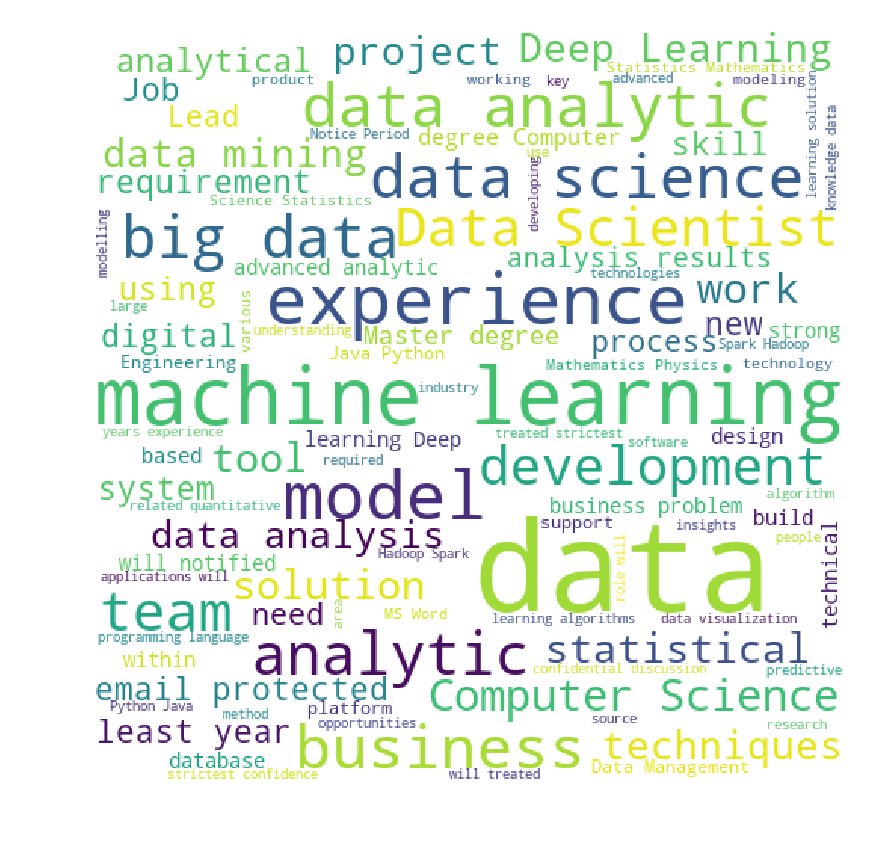

In [20]:
cloud = WordCloud(background_color='white',width=500, height=500, max_words=100).generate(cloudstring)
plt.figure( figsize=(5,5), dpi=200 )
plt.imshow(cloud)
plt.axis('off')
plt.show()